__Solow Model__
Karl Harmenberg, Feb 2019

This notebook introduces the Solow model, which in discrete time is given by

$L_{t+1} = (1+n)L_t$

$A_{t+1} = (1+g)A_t$

$K_{t+1} = sF(K_t, A_tL_t) + (1-\delta)K_t$

First, we specify $F$:

In [27]:
alpha = 0.33
def F(K, AL):
    return K**alpha*AL**(1-alpha)

Then we pick some values for the growth rates $g$ and $n$, as well as a savings rate $s$ and a depreciation rate $\delta$:

In [28]:
n = 0.00
g = 0.02
s = 0.175
delta = 0.04

Now, we simulate the economy for a couple of years, starting with $L=1.0$, $A=1.0$ and $K = 1.0$.

In [29]:
L = 1.0
A = 1.0
K = 1.0

for year in range(10):
    Lnew = (1+n)*L
    Anew = (1+g)*A
    Knew = s*F(K, A*L)+(1-delta)*K

    print("Year=", year)
    print("Lnew=", Lnew)
    print("Anew=", Anew)
    print("Knew=", Knew)
    print("-------")
    
    L = Lnew
    A = Anew
    K = Knew

Year= 0
Lnew= 1.0
Anew= 1.02
Knew= 1.135
-------
Year= 1
Lnew= 1.0
Anew= 1.0404
Knew= 1.2745050608981707
-------
Year= 2
Lnew= 1.0
Anew= 1.061208
Knew= 1.4182064980098263
-------
Year= 3
Lnew= 1.0
Anew= 1.08243216
Knew= 1.5658394263979063
-------
Year= 4
Lnew= 1.0
Anew= 1.1040808032
Knew= 1.7171759509589437
-------
Year= 5
Lnew= 1.0
Anew= 1.126162419264
Knew= 1.8720197823304596
-------
Year= 6
Lnew= 1.0
Anew= 1.14868566764928
Knew= 2.030201910485972
-------
Year= 7
Lnew= 1.0
Anew= 1.1716593810022657
Knew= 2.191577078844193
-------
Year= 8
Lnew= 1.0
Anew= 1.195092568622311
Knew= 2.356020875087312
-------
Year= 9
Lnew= 1.0
Anew= 1.2189944199947573
Knew= 2.5234273046333664
-------


We can compute the balanced growth path capital/output ratio and $K/(AL)$ (from the first homework):

In [25]:
print("BGP capital/output ratio=", s/(n+g+delta))
print("BGP K/(AL)=",(s/(n+g+delta))**(1/(1-alpha)))

BGP capital/output ratio= 2.9166666666666665
BGP K/(AL)= 4.614493064378536


Now, let's simulate the scenario where a war had destroyed half of the capital stock. Before the war, we were on the balanced growth path, so $K/(AL)= \left(\frac{s}{n+g+\delta}\right)^{1/(1-\alpha)}$.

After the war, $K = 0.5 \left(\frac{s}{n+g+\delta}\right)^{1/(1-\alpha)} AL$.

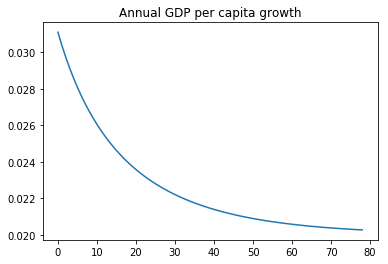

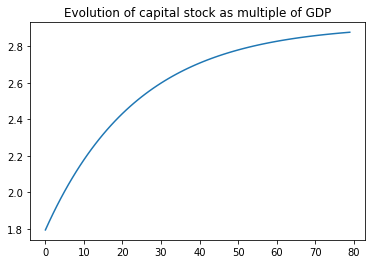

BGP capital/output ratio= 2.9166666666666665
BGP K/(AL)= 4.614493064378536


In [26]:
import numpy as np
import pylab as pl

L = 1.0
A = 1.0
K = 0.5*(s/(n+g+delta))**(1/(1-alpha))
Years = 80

gdp_list = np.zeros(Years)
k_list = np.zeros(Years)
capital_as_multiple_of_gdp = np.zeros(Years)

for year in range(Years):
    Lnew = (1+n)*L
    Anew = (1+g)*A
    Knew = s*F(K, A*L)+(1-delta)*K
    
    gdp_list[year] = F(K, A*L)/L
    k_list[year] = K/(A*L)
    capital_as_multiple_of_gdp[year] = K/F(K, A*L)
    
    L = Lnew
    A = Anew
    K = Knew

%matplotlib inline

annual_growth = gdp_list[1:]/gdp_list[:-1]-1

pl.plot(annual_growth)
pl.title("Annual GDP per capita growth")
pl.show()
pl.title("Evolution of capital stock as multiple of GDP")
pl.plot(capital_as_multiple_of_gdp)
pl.show()

print("BGP capital/output ratio=", s/(n+g+delta))
print("BGP K/(AL)=",(s/(n+g+delta))**(1/(1-alpha)))